# Under- and oversampling techniques

Let's consider the following dataset again:

## The data

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN 

# Use this code if you need large figures (on high-resolution screens)
# For bigger pictures:
#plt.rcParams["figure.dpi"] = 144

data = pd.read_csv("absent.csv",sep=';',index_col=0)

/usr/local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


There is clearly an imbalance in terms of who is, and who is not, a social smoker:

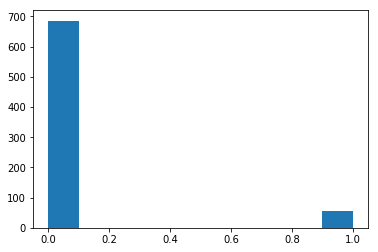

In [7]:
plt.hist(data['Social smoker'])
plt.show()

The distribution is quite skewed. Can we still use the data to predict whether someone is a social smoker or not? (just ignore that this is not the original dependent variable of the dataset, it serves as a nice example)

Let's look at two variables, service time and age:

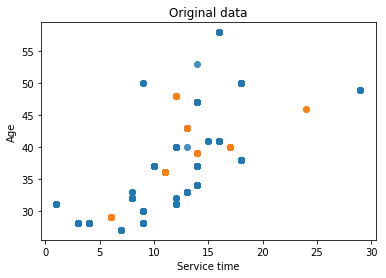

In [2]:
# You can change the variables if you want to look into other indepndent variables later yourself
var_1 = 'Service time'
var_2 = 'Age'

# Our independent variables
X = data[[var_1,var_2]]

# Our dependent variable
y = data['Social smoker']

for i in [0,1]:
    plt.scatter(X[y == i][var_1], X[y == i][var_2], alpha=.8)

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title('Original data')
plt.show()

## Undersampling

Let's try undersampling first:

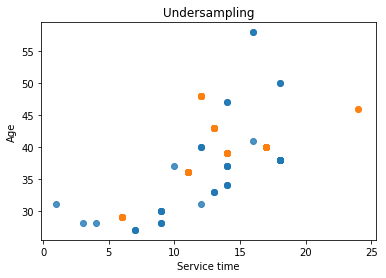

In [9]:
rus = RandomUnderSampler(random_state=10)
X_s, y_s = rus.fit_sample(X, y)

# For easy access to the columns
X_s = pd.DataFrame(X_s,columns=[var_1,var_2])

for i in [0,1]: 
    plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
plt.title('Undersampling')
plt.xlabel(var_1)
plt.ylabel(var_2)
plt.show()

A lot of non-smokers (shown in blue) are removed. 

## Oversampling

Now we'll try oversampling:

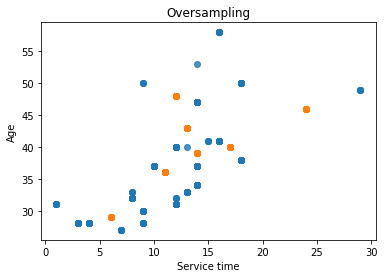

In [10]:
ros = RandomOverSampler(random_state=10)
X_s, y_s = ros.fit_sample(X, y)

X_s = pd.DataFrame(X_s,columns=[var_1,var_2])

for i in [0,1]: 
    plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
plt.title('Oversampling')
plt.xlabel(var_1)
plt.ylabel(var_2)
plt.show()

## SMOTE and ADASYN

Not much has changed compared to the original dataset. You should now try the other techniques we covered in the previous activity yourself:

In [5]:
def apply_SMOTE(X,y):
    
    ###
    ### YOUR CODE HERE
    ###
    sm = SMOTE()
    X_s, y_s = sm.fit_sample(X, y)
    print(np.count_nonzero(y==1))
    print(np.count_nonzero(y==0))
    print(np.count_nonzero(y_s==1))
    print(np.count_nonzero(y_s==0))
    X_s = pd.DataFrame(X_s,columns=[var_1,var_2])
    
    for i in [0, 1]:
        plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
    plt.title('SMOTE')
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    plt.show()
    
    
    
def apply_ADASYN(X,y):
    
    ###
    ### YOUR CODE HERE
    ###
    ada = ADASYN()

    X_s, y_s = ada.fit_sample(X, y)
    X_s = pd.DataFrame(X_s,columns=[var_1,var_2])
    
    for i in [0, 1]:
        plt.scatter(X_s[y_s == i][var_1], X_s[y_s == i][var_2], alpha=.8)
    plt.title('ADASYN')
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    plt.show()
    

Finally, verify your answer:

54
686
686
686


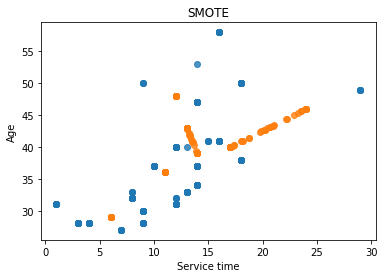

In [6]:
apply_SMOTE(X,y)

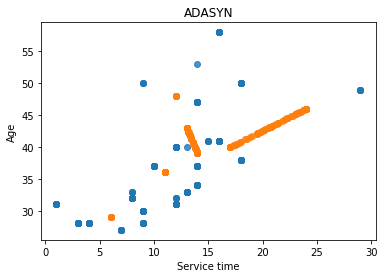

In [15]:
apply_ADASYN(X,y)